In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Name:Naveen Kumar B


 Reg no: 212222230091

In [37]:
X=torch.linspace(1,70,70).reshape(-1,1)


In [38]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (70, 1), dtype=torch.float)
y = 2 * X + 1 + e

In [39]:
print(y.shape)

torch.Size([70, 1])


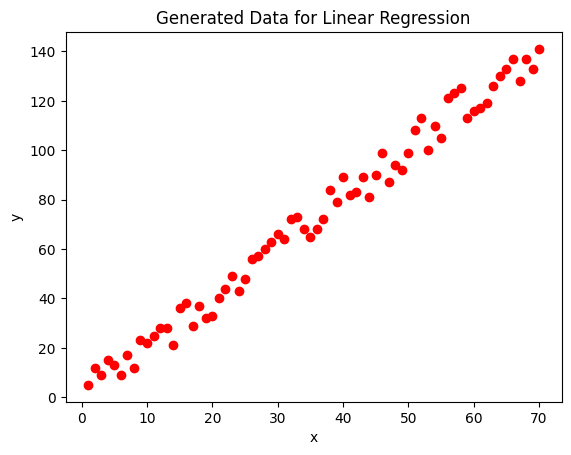

In [40]:
plt.scatter(X.numpy(), y.numpy(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [41]:
torch.manual_seed(71)
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

In [42]:
model = Model(1, 1)

In [43]:
print(f'Initial Weight: {model.linear.weight.item():.8f}')
print(f'Initial Bias  : {model.linear.bias.item():.8f}')

Initial Weight: 0.01453912
Initial Bias  : -0.33057630


In [44]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [45]:
epochs = 100
losses = []

for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)  # Compute loss
    losses.append(loss.item())  # Store loss value

    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss, weight, and bias for every epoch
    print(f'Epoch: {epoch:3}  Loss: {loss.item():10.8f}  '
          f'Weight: {model.linear.weight.item():10.8f}  '
          f'Bias: {model.linear.bias.item():10.8f}')

Epoch:   1  Loss: 6727.25781250  Weight: 0.68335736  Bias: -0.31622770
Epoch:   2  Loss: 2999.05200195  Weight: 1.12888908  Bias: -0.30663058
Epoch:   3  Loss: 1344.64416504  Weight: 1.42567873  Bias: -0.30019864
Epoch:   4  Loss: 610.49353027  Weight: 1.62338400  Bias: -0.29587522
Epoch:   5  Loss: 284.71072388  Weight: 1.75508440  Bias: -0.29295635
Epoch:   6  Loss: 140.14305115  Weight: 1.84281552  Bias: -0.29097316
Epoch:   7  Loss: 75.99055481  Weight: 1.90125668  Bias: -0.28961325
Epoch:   8  Loss: 47.52253723  Weight: 1.94018638  Bias: -0.28866854
Epoch:   9  Loss: 34.88964081  Weight: 1.96611857  Bias: -0.28800040
Epoch:  10  Loss: 29.28366280  Weight: 1.98339248  Bias: -0.28751653
Epoch:  11  Loss: 26.79589462  Weight: 1.99489868  Bias: -0.28715539
Epoch:  12  Loss: 25.69186401  Weight: 2.00256276  Bias: -0.28687602
Epoch:  13  Loss: 25.20186234  Weight: 2.00766730  Bias: -0.28665113
Epoch:  14  Loss: 24.98435402  Weight: 2.01106691  Bias: -0.28646252
Epoch:  15  Loss: 24.8877

Name:Naveen Kumar B



Reg no: 212222230091

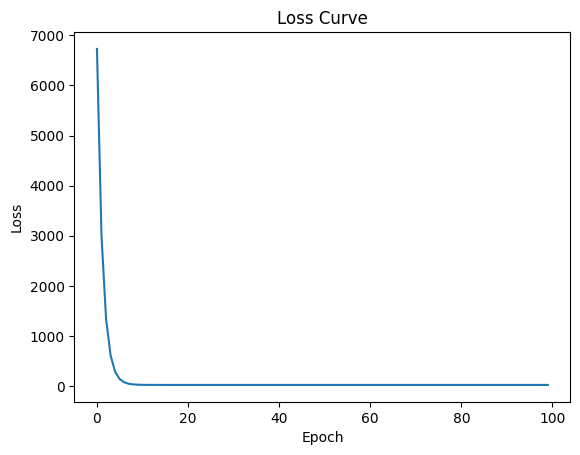

In [46]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [47]:
x1 = torch.tensor([X.min().item(), X.max().item()])
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = x1 * w1 + b1

In [48]:
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 2.01764274, Final Bias: -0.27634501
X range: [ 1. 70.]
Predicted Y values: [  1.7412977 140.95863  ]


Name: Naveen Kumar B

Reg no: 212222230091


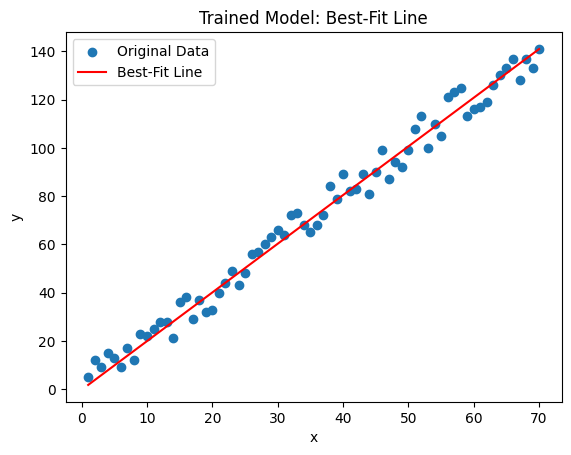

In [49]:
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [50]:
X_new = torch.tensor([[75.0]])  # Predict for X = 75
y_new = model(X_new)
print(f'Prediction for X=75: {y_new.item():.8f}')

Prediction for X=75: 151.04685974


In [51]:
torch.save(model.state_dict(),'NaveenKumarex1.pt')